In [1]:
import numpy as np
import os 
os.chdir('C:\\Users\\narayanan\\Desktop')

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Baselines.ipynb',
 'dataset',
 'desktop.ini',
 'DL_Baseline',
 'DL_Baseline.7z',
 'DL_Project_DeepFake_CNN.ipynb',
 'DL_Project_Deepfake_Prabal.ipynb',
 'fake',
 'MesoNet_1_model',
 'Mesonet_4_Model.h5',
 'metadata',
 'metadata130.csv',
 'metadata131.csv',
 'metadata132.csv',
 'Microsoft Edge.lnk',
 'real',
 'Untitled.ipynb',
 'X_256.npy',
 'y_256.npy']

In [3]:
import pandas as pd
file = pd.read_csv('metadata')

C:\Users\narayanan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
file.head()

,filename,video.@index,video.@codec_time_base,video.@width,video.@height,video.@sample_aspect_ratio,video.@display_aspect_ratio,video.@level,video.@r_frame_rate,video.@time_base,...,original,folder,wav.hash.cnt,original.cnt,md5,md5.orig,wav.hash,wav.hash.orig,pxl.hash,pxl.hash.orig
0,hrundztjfb.mp4,0,2500/150301,1920,1080,1:1,16:9,40,150301/5000,1/150301,...,vvrlglaepq.mp4,dfdc_train_part_12,3.0,2.0,7b1db59bdb78179aa3ed78a4270ed063,d98cd8af0ba7ce2a51acefb2c0502b71,6877743394119074431s,6877743394119074431s,4312499372455908935s,16061268809469102567s
1,uyfnfvsxez.mp4,0,50/2997,1920,1080,NAN,NAN,40,2997/100,1/11988,...,NAN,dfdc_train_part_12,2.0,NaN,62c47bd354599ce0fad65d28ef4b78b9,NaN,-4734951634879773329s,NaN,17835547769154037975s,NaN
2,yknlciphae.mp4,0,50/2997,1920,1080,1:1,16:9,40,2997/100,1/11988,...,ahesnzswur.mp4,dfdc_train_part_12,6.0,5.0,a0e4d1f8bf2636def22dc2f2b21187dd,3bb70580dbf21c4719f17c4e4617c398,-5599986156292069640s,-5599986156292069640s,16356267960363338360s,14219253130038039922s
3,zfyczzssiz.mp4,0,50/2997,1920,1080,1:1,16:9,40,2997/100,1/11988,...,jdvzqjihud.mp4,dfdc_train_part_12,7.0,6.0,d641ebd07badeb89c0d389019d9f7e72,c77170df2cc8b40ef1d39b6d79105321,-1564427678199738496s,-1564427678199738496s,12983824148373679782s,6108291220829004959s
4,kggbciadwj.mp4,0,125/7501,1080,1920,1:1,9:16,40,7501/250,1/15002,...,NAN,dfdc_train_part_12,9.0,NaN,7de3ddacab0c9109e2a985d2c03244ea,NaN,-1251615899500302547s,NaN,970391495631676767s,NaN


In [5]:
labels = file[file['folder']=='dfdc_train_part_13']['label']
original_video =  file[file['folder']=='dfdc_train_part_13']['original']
video_name =  file[file['folder']=='dfdc_train_part_13']['filename']
final_data = pd.DataFrame({'video_name':video_name, 'original_video':original_video, 'Label':labels})
full_data = final_data.reset_index()
full_data = full_data.drop(['index'], axis = 1)

In [6]:
full_data

,video_name,original_video,Label
0,hrnfnbtaci.mp4,zjcicdzech.mp4,FAKE
1,vjowxauwnt.mp4,zlhvoufjou.mp4,FAKE
2,filmmsbgum.mp4,ibvumqguch.mp4,FAKE
3,qsakckygbj.mp4,bjzkahdzig.mp4,FAKE
4,oxdrbsmogg.mp4,zdjjvppdoo.mp4,FAKE
...,...,...,...
3689,ohrldmapja.mp4,nqmeunktvn.mp4,FAKE
3690,prcoyakamp.mp4,jxvofbtarv.mp4,FAKE
3691,xnitfsazel.mp4,ushakujdoi.mp4,FAKE
3692,hyrzbinpsc.mp4,suevsrwyrq.mp4,FAKE


In [7]:
path = 'C:\\Users\\narayanan\\Desktop\\dataset'

In [8]:
source_path = 'C:\\Users\\narayanan\\Desktop\\dataset'
Fake_path =  'C:\\Users\\narayanan\\Desktop\\fake'
Real_path =  'C:\\Users\\narayanan\\Desktop\\real'

In [9]:
# import shutil
# def doSomething(source_path, Fake_path, Real_path):
#   for folders in os.listdir(source_path):
#     if(folders == '13_0.zip'):
#       print('A')
#       continue
#     elif(folders == 'part_1.zip'):
#       print('B')
#       continue
#     elif(folders =='real'):
#       print('C')
#       continue
#     elif(folders == 'Test'):
#       print('D')
#       continue
#     elif(folders == 'fake'):
#       print('E')
#       continue
#     else:
#       video = folders+".mp4"
#       if(full_data[full_data['video_name'] == video]['Label'].values[0] == 'FAKE'):
#         shutil.move(os.path.join(source_path, folders), Fake_path)
#       elif(full_data[full_data['video_name'] == video]['Label'].values[0] == 'REAL'):
#         shutil.move(os.path.join(source_path, folders), Real_path)
#       else:
#         continue
#     print('Video {}'.format(folders))

In [10]:
# doSomething(source_path,Fake_path,Real_path)

In [11]:
# print('FAKE',len(os.listdir(Fake_path)))
# print('REAL',len(os.listdir(Real_path)))

In [12]:
import tqdm.notebook as tq
import numpy as np
import os
from PIL import Image

In [13]:
!pip install opencv-python

In [14]:
# import cv2
# real_data_X = list()
# real_data_y = list()
# num1 = 256
# num2 = 256
# for fold in tq.tqdm(os.listdir(Real_path)):
#   new_path = os.path.join(Real_path, fold)
#   c = 0
#   for frames in os.listdir(new_path):
#     if(c == 150):
#         break
#     c = c + 1
#     #print('Frame {}'.format(frames))
#     path_a = os.path.join(new_path,frames)
#     img = cv2.imread(path_a)
#     new_img = cv2.resize(img, (num2, num1))
#     real_data_X.append(new_img)
#     real_data_y.append(1)
#   #print(fold)

In [15]:
# import cv2
# fake_data_X = list()
# fake_data_y = list()
# num1 = 256
# num2 = 256
# for fold in tq.tqdm(os.listdir(Fake_path)):
#   new_path = os.path.join(Fake_path, fold)
#   c = 0
#   for frames in os.listdir(new_path):
#     if c == 20:
#         break
#     c = c + 1
#     #print('Frame {}'.format(frames))
#     path_a = os.path.join(new_path,frames)
#     img = cv2.imread(path_a)
#     new_img = cv2.resize(img, (num2, num1))
#     fake_data_X.append(new_img)
#     fake_data_y.append(0)
#   #print(fold)

In [17]:
# np.array(real_data_X).shape, np.array(fake_data_X).shape

In [18]:
# X = np.concatenate((real_data_X, fake_data_X))
# y = np.concatenate((real_data_y, fake_data_y))

In [19]:
# np.save('X_256.npy',X)
# np.save('y_256.npy',y)

In [20]:
X = np.load('X_256.npy')
y = np.load('y_256.npy')

In [21]:
X.shape, y.shape

((78211, 256, 256, 3), (78211,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((38322, 256, 256, 3),
 (38322,),
 (23464, 256, 256, 3),
 (23464,),
 (16425, 256, 256, 3),
 (16425,))

In [25]:
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam

Image_width = 256

class Classifier:
    def __init__():
        self.model = 0
    
    #Method for Predicting 
    def predict(self, x):
        return self.model.predict(x)
    
    # For Fitting the Model Training Data
    def fit(self, x, y, epochs = 10, verbose = 1, batch_size = 256, validation_data = (X_val,y_val)):
        return self.model.fit(x, y,epochs=epochs,verbose=verbose,batch_size = batch_size,validation_data = validation_data)
    
    #For Accuracy
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    # To Load the Model
    def load(self, path):
        self.model.load_weights(path)


In [ ]:
# MesoNet 1 Classifier Class Implementation

class Meso1(Classifier):
    """
    Contains both Feature extraction and Classification
    """
    #Initializing our model with Learning rate, dilation rate and Adam Optimizer
    def __init__(self, learning_rate = 0.001, dl_rate = 1):
        self.model = self.init_model(dl_rate)
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    # This method will return the Architecture i.e Contains Layers for our Network 
    def init_model(self, dl_rate):
        x = Input(shape = (Image_width, Image_width, 3))
        # Two Convolutional Layers added
        x1 = Conv2D(16, (3, 3), dilation_rate = dl_rate, strides = 1, padding='same', activation = 'relu')(x)
        x1 = Conv2D(4, (1, 1), padding='same', activation = 'relu')(x1)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(8, 8), padding='same')(x1)

        y = Flatten()(x1)
        #Dropout of 0.5 is added at last layer 
        y = Dropout(0.5)(y)
        #Sigmoid Activation function is used
        y = Dense(1, activation = 'sigmoid')(y)
        return KerasModel(inputs = x, outputs = y)

In [ ]:
class Meso4(Classifier):
    #Intializing our Network with Learning rate, and adam Optimizer.
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    #For Meso Classifier our network contains 4 convolution layers with 3x3 kernel size in first and other 3 contains
    #5x5 Kernel size and activation ReLu is used.
    def init_model(self): 
        x = Input(shape = (Image_width, Image_width, 3))
        #First Convolutional Layer
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        #Second Convolution Layer
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        #Third Convolutional Layer
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        #Fourth Convolutional Layer
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        #Dropout of 0.5 is added
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        #Dropout of 0.5 is added again
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

In [26]:
#GPU Testing 
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

['/device:CPU:0', '/device:GPU:0']

In [27]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

classifier_1 = Meso1()
classifier_2 = Meso4()

In [28]:
history_1 = classifier_1.fit(X_train, y_train, epochs = 20, batch_size = 256, verbose = 1, validation_data = (X_val,y_val))

Epoch 1/20
150/150 [==============================] - 104s 557ms/step - loss: 0.2427 - accuracy: 0.6835 - val_loss: 0.1927 - val_accuracy: 0.7322
Epoch 2/20
150/150 [==============================] - 80s 534ms/step - loss: 0.1967 - accuracy: 0.7400 - val_loss: 0.2687 - val_accuracy: 0.6347
Epoch 3/20
150/150 [==============================] - 80s 533ms/step - loss: 0.1778 - accuracy: 0.7613 - val_loss: 0.1527 - val_accuracy: 0.7893
Epoch 4/20
150/150 [==============================] - 80s 533ms/step - loss: 0.1691 - accuracy: 0.7725 - val_loss: 0.1558 - val_accuracy: 0.7896
Epoch 5/20
150/150 [==============================] - 80s 533ms/step - loss: 0.1616 - accuracy: 0.7820 - val_loss: 0.1462 - val_accuracy: 0.8014
Epoch 6/20
150/150 [==============================] - 80s 533ms/step - loss: 0.1570 - accuracy: 0.7880 - val_loss: 0.1713 - val_accuracy: 0.7448
Epoch 7/20
150/150 [==============================] - 80s 533ms/step - loss: 0.1522 - accuracy: 0.7921 - val_loss: 0.2298 - val_a

In [29]:
classifier_1.model.save('Mesonet_1_Model.h5')

In [104]:
# classifier_1 = load_model('Mesonet_1_Model.h5')

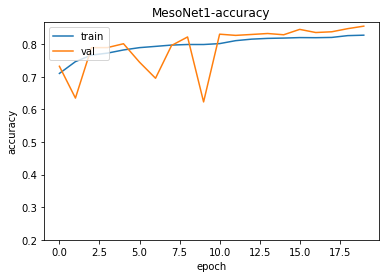

In [44]:
#For Plotting
import matplotlib.pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('MesoNet1-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(bottom = 0.2)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

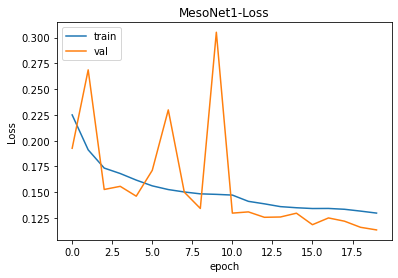

In [42]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('MesoNet1-Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
#plt.ylim(top = 0.5,bottom = 0)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
history_2 = classifier_2.fit(X_train, y_train, epochs = 20, batch_size = 256, verbose = 1, validation_data = (X_val,y_val))

Epoch 1/20
150/150 [==============================] - 74s 466ms/step - loss: 0.2283 - accuracy: 0.6941 - val_loss: 0.1650 - val_accuracy: 0.7660
Epoch 2/20
150/150 [==============================] - 67s 444ms/step - loss: 0.1650 - accuracy: 0.7744 - val_loss: 0.1366 - val_accuracy: 0.8097
Epoch 3/20
150/150 [==============================] - 66s 443ms/step - loss: 0.1413 - accuracy: 0.8118 - val_loss: 0.1267 - val_accuracy: 0.8187
Epoch 4/20
150/150 [==============================] - 66s 442ms/step - loss: 0.1259 - accuracy: 0.8315 - val_loss: 0.1055 - val_accuracy: 0.8590
Epoch 5/20
150/150 [==============================] - 66s 443ms/step - loss: 0.1149 - accuracy: 0.8462 - val_loss: 0.0983 - val_accuracy: 0.8630
Epoch 6/20
150/150 [==============================] - 66s 443ms/step - loss: 0.1061 - accuracy: 0.8570 - val_loss: 0.0955 - val_accuracy: 0.8648
Epoch 7/20
150/150 [==============================] - 66s 443ms/step - loss: 0.0995 - accuracy: 0.8660 - val_loss: 0.0819 - val_ac

In [ ]:
#Saving the Trained Model

In [37]:
classifier_2.model.save('Mesonet_4_Model.h5')

In [ ]:
# classifier_2 = load_model('Mesonet_4_Model.h5')

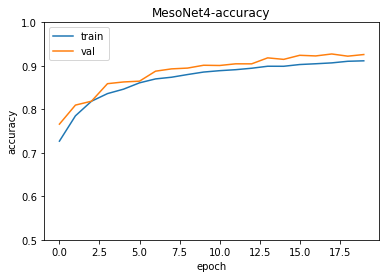

In [38]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('MesoNet4-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(top = 1,bottom = 0.5)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

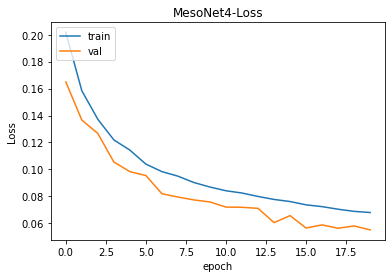

In [45]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('MesoNet4-Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
#plt.ylim(top = 0.2,bottom = 0)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Testing

In [49]:
y_pred1 = classifier_1.predict(X_test)
y_pred2 = classifier_2.predict(X_test)

In [61]:
#Since our Model predicts probability of belonging to class 0 or 1 for testing purpose we have taken the threshold of 0.5.
def predictfromprob(y_pred):
    temp = []
    for i in range(len(y_pred)):
        if(y_pred[i] >0.5):
            temp.append(1)
        else:
            temp.append(0)
    return temp

In [62]:
from sklearn.metrics import accuracy_score
print('Accuracy Mesonet1 is {}'.format(accuracy_score(predictfromprob(y_pred1),y_test)))
print('Accuracy Mesonet4 is {}'.format(accuracy_score(predictfromprob(y_pred2),y_test)))

Accuracy Mesonet1 is 0.8585066484827821
Accuracy Mesonet4 is 0.9252471871803614


In [63]:
train_pred1 = classifier_1.predict(X_train)
train_pred2 = classifier_2.predict(X_train)

In [64]:
print('Train Accuracy Mesonet1 is {}'.format(accuracy_score(predictfromprob(train_pred1),y_train)))
print('Train Accuracy Mesonet4 is {}'.format(accuracy_score(predictfromprob(train_pred2),y_train)))

Train Accuracy Mesonet1 is 0.8603674129742707
Train Accuracy Mesonet4 is 0.9338761024998695
